In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
# load processed features
feature_path = "../data/processed/xmr_features.csv"
assert os.path.exists(feature_path), "Feature file not found. Run feature_engineering.py first."
df = pd.read_csv(feature_path, parse_dates=["time"])
df.sort_values("time", inplace=True)


In [4]:
# initializing signal column
df["signal"] = 0

# rsi-based mean reversion
df.loc[df["rsi_14"] < 30, "signal"] = 1   # Buy signal
df.loc[df["rsi_14"] > 70, "signal"] = -1  # Sell signal

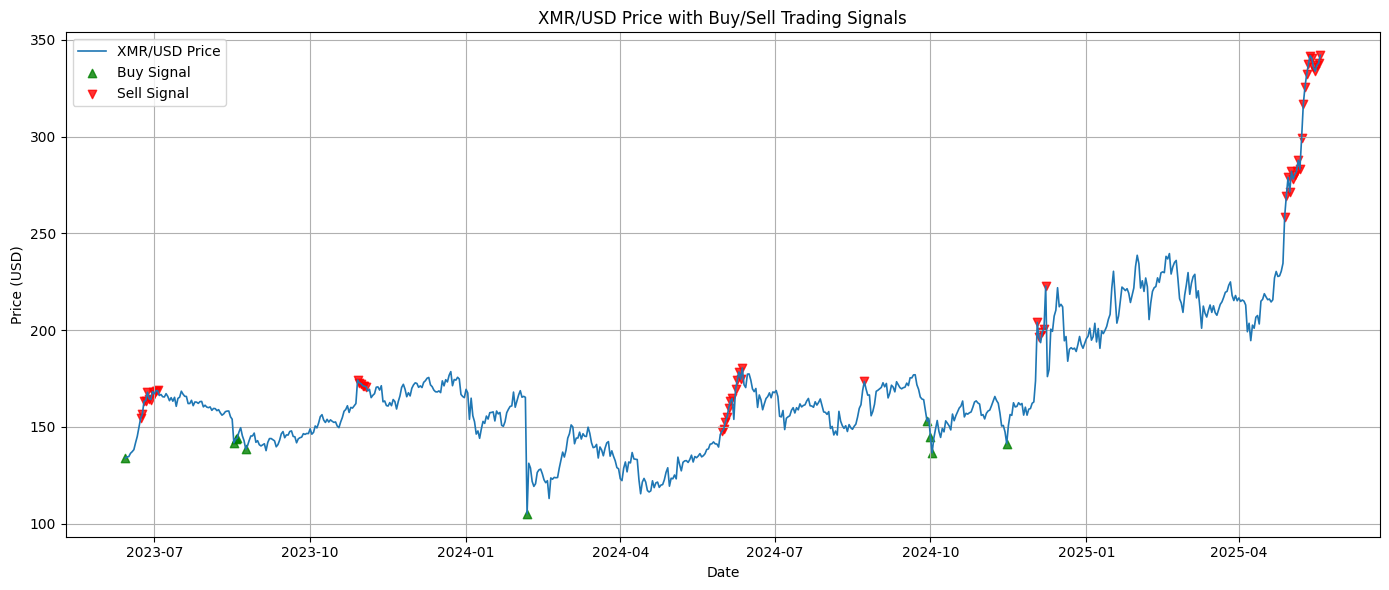

In [5]:
buy_signals = df[df["signal"] == 1]
sell_signals = df[df["signal"] == -1]

plt.figure(figsize=(14, 6))
plt.plot(df["time"], df["close"], label="XMR/USD Price", linewidth=1.2)
plt.scatter(buy_signals["time"], buy_signals["close"], marker="^", color="green", label="Buy Signal", alpha=0.8)
plt.scatter(sell_signals["time"], sell_signals["close"], marker="v", color="red", label="Sell Signal", alpha=0.8)
plt.title("XMR/USD Price with Buy/Sell Trading Signals")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

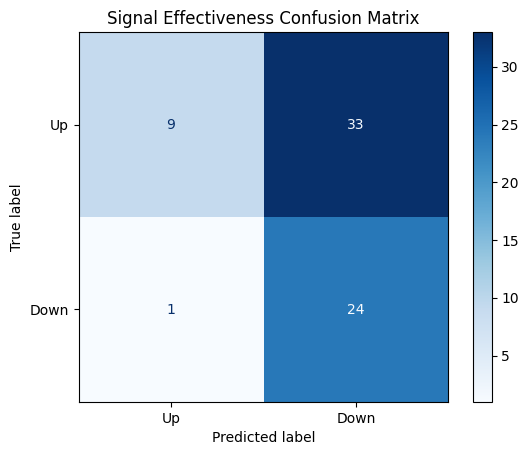

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Look ahead one day to see if signal was correct
df["next_close"] = df["close"].shift(-1)
df["price_direction"] = np.where(df["next_close"] > df["close"], 1, -1)

# Only evaluate rows where a signal was given
mask = df["signal"] != 0
y_true = df.loc[mask, "price_direction"]
y_pred = df.loc[mask, "signal"]

# Build and display confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[1, -1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Up", "Down"])
disp.plot(cmap="Blues")
plt.title("Signal Effectiveness Confusion Matrix")
plt.show()


In [7]:
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Up", "Down"]))


Classification Report:
              precision    recall  f1-score   support

          Up       0.42      0.96      0.59        25
        Down       0.90      0.21      0.35        42

    accuracy                           0.49        67
   macro avg       0.66      0.59      0.47        67
weighted avg       0.72      0.49      0.44        67

